In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
df = pd.read_csv('DF.csv')

In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0       24837            13     2443          6          12   
1       18443            42     3985          2          22   
2       34465             4      955          5          16   
3        2313             4     1947          0          14   
4       27694             6     2578          5           9   

   order_days_since_prior  weekend part_of_day  aisle_id  department_id  \
0                       8        0     Morning        91             16   
1                       4        0       Night         3             19   
2                      30        0   Afternoon       116              1   
3                      30        1   Afternoon       108             16   
4                      11        0     Morning       106             12   

     ...           p0        p1        p2        p3        p4        p5  \
0    ...    -1.095099 -0.475762 -1.862628  1.146113 -1.339461 -0.200766   
1    ...     0.634455 -1.230147 -1.488395 -0.034586 -0.618366 -0.007423   
2    ...     0.079378  0.747415 -1.555594 -0.112197  0.035845  0.719953   
3    ...     1.239049 -0.223365 -1.256200 -0.321383 -0.805984 -0.804772   
4    ...     1.441178 -2.263787 -1.612550  1.472553 -0.337348  0.834804   

         p6        p7        p8        p9  
0  0.575519  0.802295 -0.222551  1.693820  
1 -0.385629 -0.630212 -1.770816  1.248619  
2 -1.300576  0.730117 -0.879446 -0.916316  
3 -0.992423 -0.475296  0.269520  0.972645  
4  0.651652  1.604419  0.744860  1.067898  

[5 rows x 24 columns]

# SGDClassifier

In [4]:
from sklearn.cross_validation import train_test_split

C:\Program Files\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['future_buy','product_id','part_of_day'],axis=1),df['future_buy'],test_size=0.3,random_state=101)

In [6]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [7]:
pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.78      0.08      0.15    165830
          1       0.28      0.94      0.43     62695

avg / total       0.64      0.32      0.23    228525



In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[ 13845, 151985],
       [  3940,  58755]])

# KNN

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop(['future_buy','product_id','part_of_day'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop(['future_buy','product_id','part_of_day'],axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.drop(['future_buy','product_id','part_of_day'],axis=1).columns)
df_feat.head()

order_number   user_id  order_dow  order_hour  order_days_since_prior  \
0     -0.225991 -0.064139   1.552930   -0.332463               -0.295048   
1      1.408768  0.996545  -0.359531    2.037346               -0.336722   
2     -0.733330 -1.087680   1.074815    0.615461               -0.065838   
3     -0.733330 -0.405319  -1.315761    0.141499               -0.065838   
4     -0.620588  0.028722   1.074815   -1.043406               -0.263792   

    weekend  aisle_id  department_id  number_of_products_in_order  \
0 -0.752990  0.521135       0.956659                    -0.055148   
1 -0.752990 -1.777375       1.433634                     0.048213   
2 -0.752990  1.174121      -1.428214                    -1.192121   
3  1.328039  0.965165       0.956659                    -0.882037   
4 -0.752990  0.912926       0.320693                    -0.158509   

   days_to_next_order    ...           p0        p1        p2        p3  \
0            0.417791    ...    -1.582347 -0.569576 -1.618169  1.269707   
1           -0.909972    ...     0.198745 -1.331563 -1.237457  0.064334   
2           -1.020619    ...    -0.372873  0.665927 -1.305819 -0.014899   
3            2.077495    ...     0.821354 -0.314635 -1.001241 -0.228456   
4           -0.688678    ...     1.029505 -2.375619 -1.363761  1.602969   

         p4        p5        p6        p7        p8        p9  
0 -0.974666 -0.035849  0.237263  0.507704 -0.081089  1.622925  
1 -0.258734  0.153884 -0.657662 -0.996434 -1.591200  1.179054  
2  0.390792  0.867680 -1.509570  0.431918 -0.721797 -0.979413  
3 -0.445009 -0.628577 -1.222649 -0.833771  0.398855  0.903905  
4  0.020271  0.980387  0.308151  1.349938  0.862483  0.998874  

[5 rows x 21 columns]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_features,df['future_buy'],test_size=0.3,random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
print(confusion_matrix(Y_test,pred))

[[123667  42163]
 [ 35156  27539]]


In [17]:
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.78      0.75      0.76    165830
          1       0.40      0.44      0.42     62695

avg / total       0.67      0.66      0.67    228525



In [23]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

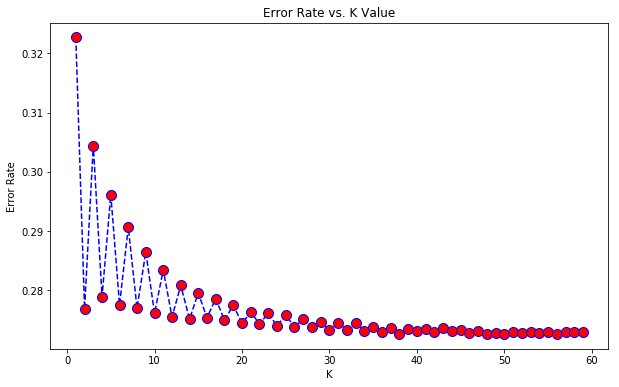

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

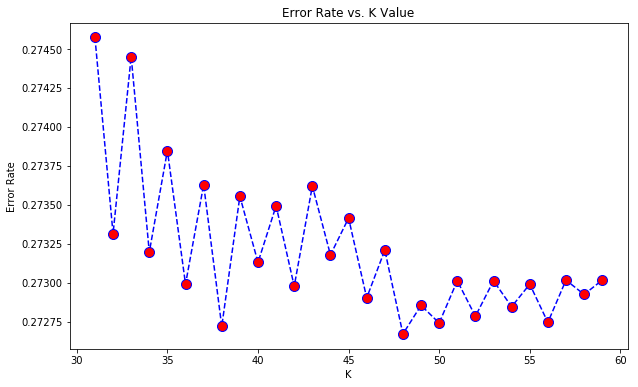

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(31,60),error_rate[30:60],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
error_rate.index(min(error_rate))

47

looks like 47 is the best n_neighbors

In [51]:
knn = KNeighborsClassifier(n_neighbors=47)

In [52]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=47, p=2,
           weights='uniform')

In [53]:
pred = knn.predict(X_test)

In [54]:
print(confusion_matrix(Y_test,pred))

[[161689   4141]
 [ 58294   4401]]


In [55]:
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.74      0.98      0.84    165830
          1       0.52      0.07      0.12     62695

avg / total       0.67      0.73      0.64    228525

